In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# resize image to 640x480 
# im_org = Image.open("image.jpg").resize((640, 480))
# im_org.save("image_sd.jpg")

im = Image.open("image_sd.jpg")
im_arr = np.array(im)

In [2]:
with open("image_sd.bin", "w") as file:
    for r in im_arr:
        for p in r:
            for c in p:
                file.write(format(c, '08b'))
            file.write('00 ')
        file.write("\n")

In [ ]:
with open("image_sd.dec", "w") as file:
    for r in im_arr:
        for p in r:
            r,g,b = p
            file.write(format(r, '03d')+",")
            file.write(format(g, '03d')+",")
            file.writ1e(format(b, '03d')+";")

## RGB filter

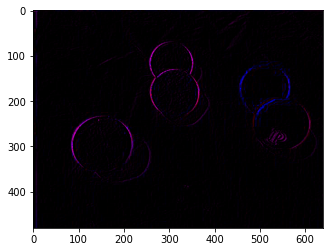

In [2]:
result_arr = []

with open("image_sd_rgb.out", "r") as file:
    pixcels = file.read().split(';')
    for pixcel in pixcels:
        r, g, b = pixcel.split(',')
        r = np.uint8(abs(int(r))*1)
        g = np.uint8(abs(int(g))*1)
        b = np.uint8(abs(int(b))*1)
        p = [r, g, b]
        result_arr.append(p)

result_arr = np.asarray(result_arr)
result_arr = result_arr.reshape(480, 640, 3)
# result_arr = np.rot90(np.fliplr(result_arr))
# result_arr = result_arr.reshape(480,640,3)
# result_arr = np.rot90(result_arr, k=3)

plt.imshow(result_arr)
plt.imsave("image_border.jpg", result_arr)

## HSV Filter

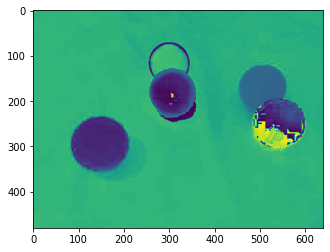

In [14]:
result_arr = []

with open("image_sd_hsv.out", "r") as file:
    pixcels = file.read().split(';')
    for pixcel in pixcels:
        h = np.uint8(abs(int(pixcel))*1)
        result_arr.append(h)

result_arr = np.asarray(result_arr)
result_arr = result_arr.reshape(480, 640)

plt.imshow(result_arr)
plt.imsave("image_border_hue.jpg", result_arr)

# Image processing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


583


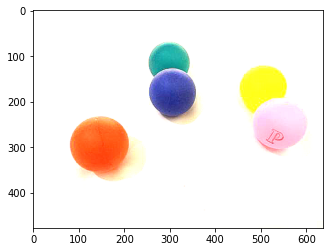

In [4]:
identity = np.array([[-1,  0,  0,  0, -1],
                     [ 0, -1,  0, -1,  0],
                     [ 0,  0,  9,  0,  0],
                     [ 0, -1,  0, -1,  0],
                     [-1,  0,  0,  0, -1]])

identity = np.array([[-1,  0, -1],
                     [ 0,  6,  0],
                     [-1,  0, -1]])

def rgb_convolve2d(image, kernel):
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)

conv_im1 = rgb_convolve2d(im_arr, identity)
print(np.amax(conv_im1))
plt.imshow(abs(conv_im1))
# fig, ax = plt.subplots(1,2, figsize=(12,5))
# ax[0].imshow(identity, cmap='gray')
# ax[1].imshow(abs(conv_im1), cmap='gray');

In [ ]:
im_avg_arr = array(im)
r, c , p = im_avg_arr.shape

for i in range(0,r):
    for j in range(N, c):
        avg = [0, 0, 0]
        for k in range(0, p):
            sum = 0
            for n in range(0, N):
                sum += im_arr[i][j-n][k]
            avg[k] = sum/N
        im_avg_arr[i,j] = avg 

im_avg = Image.fromarray(im_avg_arr)
im_avg.save("image_avg.jpg")